In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [32]:
train_dir = 'Datasets/Brain_Tumor/brain tumour/Training'
test_dir = 'Datasets/Brain_Tumor/brain tumour/Testing'

In [33]:

# Image data generator for training and testing
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

In [34]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [35]:
# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images
    batch_size=32,
    class_mode='categorical',
    shuffle=True)  # Use categorical for multi-class classification


Found 2870 images belonging to 4 classes.


In [36]:
# Check class indices
print("Class indices:", train_generator.class_indices)

Class indices: {'glioma_tumor': 0, 'meningioma_tumor': 1, 'no_tumor': 2, 'pituitary_tumor': 3}


In [37]:
# Image data generator for testing
test_datagen = ImageDataGenerator(rescale=1./255)

In [38]:
# Load images from the test directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical')  # Multi-class classification


Found 394 images belonging to 4 classes.


In [39]:
# Build the CNN model
model = Sequential()


In [40]:
# Convolutional layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer for regularization
model.add(Dense(4, activation='softmax'))  # 4 classes: glioma, meningioma, notumor, pituitary

C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [41]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
# Train the model
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    validation_data=test_generator,
                    validation_steps=len(test_generator),
                    epochs=10) 

C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 849ms/step - accuracy: 0.3045 - loss: 1.4538

C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 90s 943ms/step - accuracy: 0.3050 - loss: 1.4525 - val_accuracy: 0.1371 - val_loss: 1.7221
Epoch 2/10


C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 124s 799ms/step - accuracy: 0.4020 - loss: 1.2254 - val_accuracy: 0.2513 - val_loss: 1.9541
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 88s 975ms/step - accuracy: 0.4876 - loss: 1.1410 - val_accuracy: 0.3020 - val_loss: 2.9960
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 72s 799ms/step - accuracy: 0.5294 - loss: 1.0589 - val_accuracy: 0.3274 - val_loss: 3.1763
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 78s 863ms/step - accuracy: 0.5851 - loss: 0.9690 - val_accuracy: 0.3579 - val_loss: 3.7164
Epoch 10/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


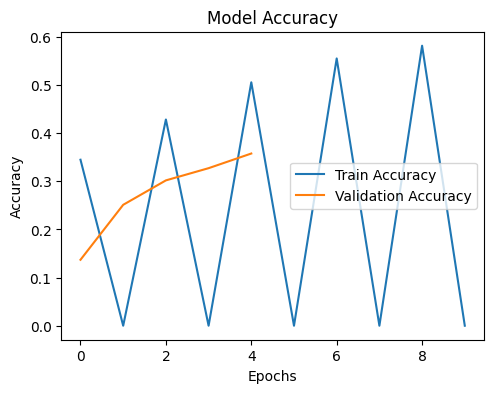

In [43]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

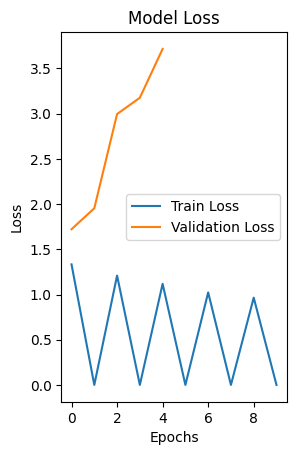

In [44]:
# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [46]:
def display_prediction(image_path, actual_label):
    
    # Load the image
    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Get the class labels
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class]

    # Display the image
    plt.imshow(img)
    

    # Set title with actual and predicted labels
    if actual_label is not None:
        plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')
    else:
        plt.title(f'Predicted: {predicted_label}')

    plt.show()


display_prediction('Testing/pituitary/Te-pi_0010.jpg', actual_label='pituitary')  

FileNotFoundError: [Errno 2] No such file or directory: 'Testing/pituitary/Te-pi_0010.jpg'

In [1]:
model.evalauate(test_generator)

NameError: name 'model' is not defined

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import numpy as np
from PIL import Image

# Define the directory to save the dataset
save_dir = "cifar10_dataset"
os.makedirs(save_dir, exist_ok=True)

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Combine training and test data
x_data = np.concatenate((x_train, x_test))
y_data = np.concatenate((y_train, y_test))

# Save images to the specified directory
for i, img in enumerate(x_data):
    # Create a subdirectory for each class
    class_dir = os.path.join(save_dir, str(y_data[i][0]))
    os.makedirs(class_dir, exist_ok=True)
    
    # Convert the image to a PIL Image and save it
    image = Image.fromarray(img)
    image.save(os.path.join(class_dir, f"image_{i}.png"))

print(f"CIFAR-10 dataset has been downloaded and saved to {save_dir}")


CIFAR-10 dataset has been downloaded and saved to cifar10_dataset
